In [4]:
from google.colab import files
uploaded = files.upload()

Saving tbl_air_from_sql.csv to tbl_air_from_sql.csv
Saving tbl_country_from_sql.csv to tbl_country_from_sql.csv
Saving tbl_disease_from_sql.csv to tbl_disease_from_sql.csv
Saving tbl_food_consumption_from_sql.csv to tbl_food_consumption_from_sql.csv
Saving tbl_food_from_sql.csv to tbl_food_from_sql.csv
Saving tbl_health_from_sql.csv to tbl_health_from_sql.csv


In [5]:
import pandas as pd

air = pd.read_csv("tbl_air_from_sql.csv")
countries = pd.read_csv("tbl_country_from_sql.csv")
disease = pd.read_csv("tbl_disease_from_sql.csv")
food_consumption = pd.read_csv("tbl_food_consumption_from_sql.csv")
food = pd.read_csv("tbl_food_from_sql.csv")
health = pd.read_csv("tbl_health_from_sql.csv")
disease.head()

,Disease,Disease Category,disease_id
0,CANCER,Autoimmune,1
1,CANCER,Respiratory,2
2,CANCER,Parasitic,3
3,CANCER,Genetic,4
4,CANCER,Infectious,5


In [6]:
air.info()
countries.info()
health.info()
food_consumption.info()
disease.info()
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13660 entries, 0 to 13659
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_id         13660 non-null  int64  
 1   Year               13660 non-null  int64  
 2   Date               13660 non-null  object 
 3   City               13660 non-null  object 
 4   AQI                13660 non-null  int64  
 5   PM2.5 (Âµg/mÂ³)    13660 non-null  float64
 6   PM10 (Âµg/mÂ³)     13660 non-null  float64
 7   NO2 (ppb)          13660 non-null  float64
 8   SO2 (ppb)          13660 non-null  float64
 9   CO (ppm)           13660 non-null  float64
 10  O3 (ppb)           13660 non-null  float64
 11  Temperature (Â°C)  13660 non-null  float64
 12  Humidity (%)       13660 non-null  int64  
 13  Wind Speed (m/s)   13660 non-null  float64
 14  id                 13660 non-null  int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.6+ MB
<class 'panda

In [7]:
health_clean = health.groupby(["country_id", "Year"]).mean().reset_index()

In [8]:
merged1 = air.merge(health_clean, on=["country_id", "Year"], how="left")

In [9]:
numeric_food = ["Fat", "Carbs", "Protein", "total_calories"]
food_clean = food_consumption.groupby(["country_id", "Year"])[numeric_food].mean().reset_index()

In [10]:
merged2 = merged1.merge(food_clean, on=["country_id", "Year"], how="left")

In [11]:
numeric_cols = merged2.select_dtypes(include=['number']).columns
merged2[numeric_cols] = merged2[numeric_cols].fillna(merged2[numeric_cols].mean())

In [12]:
merged = merged2.merge(countries, on="country_id", how="left")

In [13]:
# تحويل disease_id في كلا الجدولين لنفس النوع
merged['disease_id'] = merged['disease_id'].astype(int)
disease['disease_id'] = disease['disease_id'].astype(int)

# بعد كده اعملي merge
merged = merged.merge(disease[['disease_id', 'Disease', 'Disease Category']], on='disease_id', how='left')

In [15]:
merged.head()

,country_id,Year,Date,City,AQI,PM2.5 (Âµg/mÂ³),PM10 (Âµg/mÂ³),NO2 (ppb),SO2 (ppb),CO (ppm),...,Urbanization Rate (%),id_y,disease_id,Fat,Carbs,Protein,total_calories,Country,Disease,Disease Category
0,1,2024,2024-01-01,New York,38,120.0,182.9,24.3,26.0,9.10,...,59.9175,20.50,2,7.920000,18.840000,28.350000,259.400000,USA,CANCER,Respiratory
1,8,2024,2024-01-07,SÃ£o Paulo,159,158.5,52.6,37.1,34.3,5.23,...,59.6875,431.00,2,16.285714,4.428571,3.857143,173.428571,BRAZIL,CANCER,Respiratory
2,1,2024,2024-01-01,Los Angeles,280,38.4,46.9,41.8,34.7,3.78,...,59.9175,20.50,2,7.920000,18.840000,28.350000,259.400000,USA,CANCER,Respiratory
3,2,2024,2024-01-01,London,117,168.1,34.3,81.5,8.2,3.67,...,33.6075,69.75,2,11.169696,34.533511,14.123609,296.334220,UK,CANCER,Respiratory
4,3,2024,2024-01-01,Beijing,197,96.8,35.4,18.5,39.4,9.51,...,65.0650,4.25,2,11.286316,26.427368,9.064211,235.000000,CHINA,CANCER,Respiratory


In [14]:
merged.isnull().sum()

,0
country_id,0
Year,0
Date,0
City,0
AQI,0
PM2.5 (Âµg/mÂ³),0
PM10 (Âµg/mÂ³),0
NO2 (ppb),0
SO2 (ppb),0
CO (ppm),0


In [16]:
# Exploratory Data Analysis (EDA)
# =========================

# 1️⃣ نظرة عامة على البيانات
merged.info()       # معلومات عن الأعمدة، نوع البيانات، ووجود missing values
merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13660 entries, 0 to 13659
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_id                  13660 non-null  int64  
 1   Year                        13660 non-null  int64  
 2   Date                        13660 non-null  object 
 3   City                        13660 non-null  object 
 4   AQI                         13660 non-null  int64  
 5   PM2.5 (Âµg/mÂ³)             13660 non-null  float64
 6   PM10 (Âµg/mÂ³)              13660 non-null  float64
 7   NO2 (ppb)                   13660 non-null  float64
 8   SO2 (ppb)                   13660 non-null  float64
 9   CO (ppm)                    13660 non-null  float64
 10  O3 (ppb)                    13660 non-null  float64
 11  Temperature (Â°C)           13660 non-null  float64
 12  Humidity (%)                13660 non-null  int64  
 13  Wind Speed (m/s)            136

,country_id,Year,AQI,PM2.5 (Âµg/mÂ³),PM10 (Âµg/mÂ³),NO2 (ppb),SO2 (ppb),CO (ppm),O3 (ppb),Temperature (Â°C),...,Hospital Beds per 1000,Recovery Rate (%),Improvement in 5 Years (%),Urbanization Rate (%),id_y,disease_id,Fat,Carbs,Protein,total_calories
count,13660.000000,13660.000000,13660.000000,13660.000000,13660.000000,13660.000000,13660.000000,13660.000000,13660.000000,13660.000000,...,13660.000000,13660.000000,13660.000000,13660.000000,13660.000000,13660.0,13660.000000,13660.000000,13660.000000,13660.000000
mean,8.298097,2023.267936,193.917277,90.559099,117.928127,52.402832,25.504136,5.041515,105.842557,14.941296,...,5.467313,75.086059,5.106144,52.598482,745.022206,2.0,11.169696,34.533511,14.123609,296.334220
std,5.552656,0.442900,65.603552,55.745657,67.889143,27.332543,14.069190,2.852259,55.067048,14.482971,...,1.390228,7.279520,1.055530,10.625000,460.540219,0.0,6.832684,33.502910,8.589652,190.620883
min,1.000000,2023.000000,30.000000,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.000000,...,3.107500,60.207500,2.697500,33.607500,4.250000,2.0,0.000000,0.000000,0.000000,96.750000
25%,4.000000,2023.000000,156.000000,45.200000,61.907500,28.570000,13.320000,2.570000,58.267500,2.210000,...,4.585000,69.735000,4.190000,44.557500,431.000000,2.0,6.174000,12.615385,9.064211,176.388889
50%,7.000000,2023.000000,195.000000,86.680000,113.825000,52.300000,25.500000,5.050000,106.000000,14.800000,...,5.467313,75.086059,5.106144,52.598482,745.022206,2.0,11.169696,29.666667,14.123609,259.400000
75%,13.000000,2024.000000,248.000000,126.592500,166.265000,75.970000,37.700000,7.500000,153.712500,27.420000,...,5.950000,81.397500,6.005000,57.350000,1196.750000,2.0,14.562500,41.412000,21.103077,308.142857
max,19.000000,2024.000000,300.000000,250.000000,300.000000,100.000000,50.000000,10.000000,200.000000,40.000000,...,9.010000,91.530000,7.342500,82.895000,1517.250000,2.0,27.760769,142.326154,28.350000,905.538462


In [17]:
#2️⃣ تحليل التشتت بين المتغيرات
numeric_cols = merged.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# عرض المصفوفة
print(correlation_matrix)

                            country_id      Year       AQI  PM2.5 (Âµg/mÂ³)  \
country_id                    1.000000 -0.402934  0.120048        -0.156555   
Year                         -0.402934  1.000000 -0.269978         0.388767   
AQI                           0.120048 -0.269978  1.000000        -0.107042   
PM2.5 (Âµg/mÂ³)              -0.156555  0.388767 -0.107042         1.000000   
PM10 (Âµg/mÂ³)               -0.132765  0.328463 -0.082019         0.144633   
NO2 (ppb)                    -0.006156  0.012349  0.001981         0.008882   
SO2 (ppb)                    -0.021386  0.018757 -0.018114        -0.005870   
CO (ppm)                     -0.004376 -0.003749 -0.009224        -0.007660   
O3 (ppb)                      0.004494 -0.005676  0.001204         0.009022   
Temperature (Â°C)             0.005959  0.005039 -0.001952        -0.001509   
Humidity (%)                  0.039180 -0.077364  0.021262        -0.032814   
Wind Speed (m/s)              0.088253 -0.200298  0.

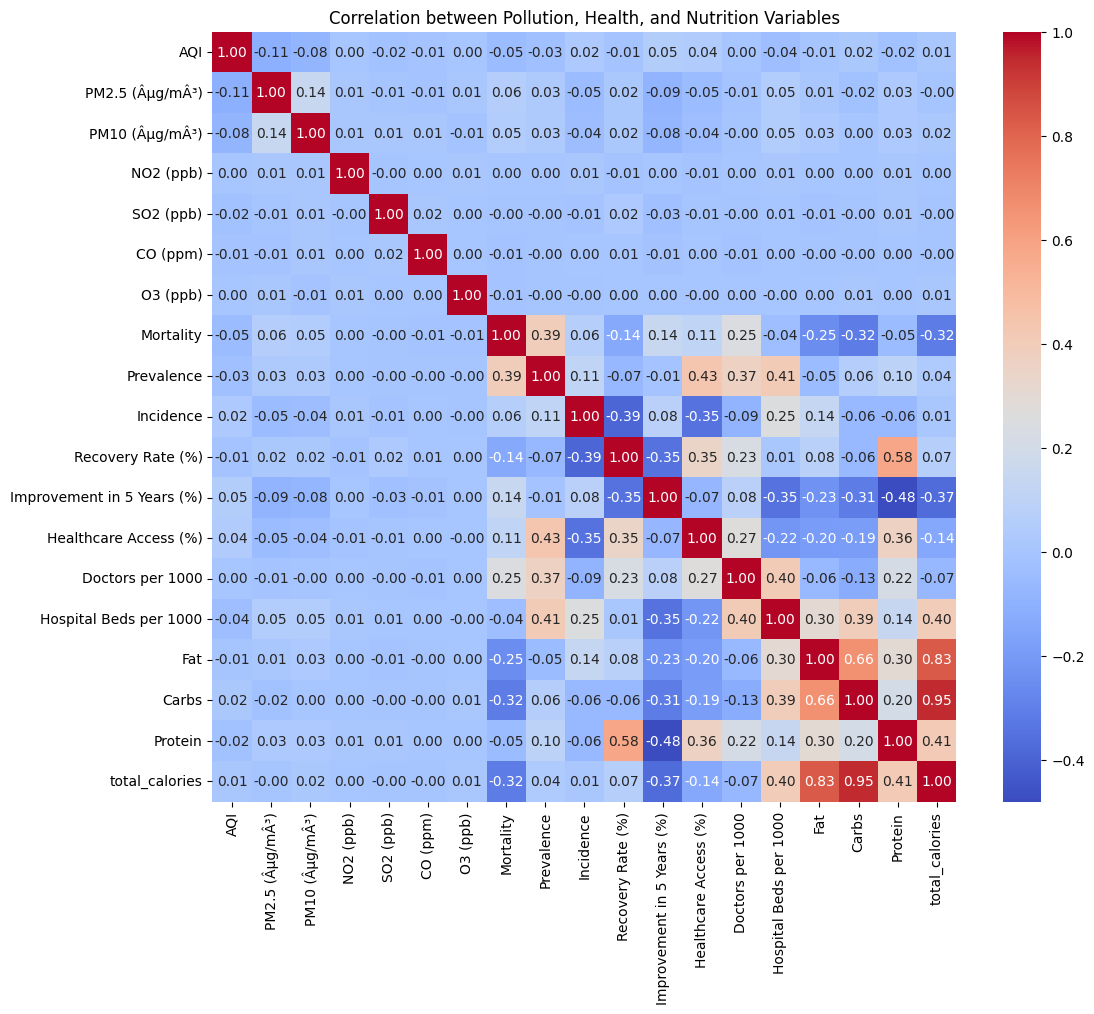

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# اختيار الأعمدة المهمة من كل الجداول
cols_of_interest = [
    'AQI', 'PM2.5 (Âµg/mÂ³)', 'PM10 (Âµg/mÂ³)', 'NO2 (ppb)', 'SO2 (ppb)', 'CO (ppm)', 'O3 (ppb)',  # Pollution
    'Mortality', 'Prevalence', 'Incidence', 'Recovery Rate (%)', 'Improvement in 5 Years (%)', 'Healthcare Access (%)', 'Doctors per 1000', 'Hospital Beds per 1000',  # Health
    'Fat', 'Carbs', 'Protein', 'total_calories'  # Nutrition
]

# عمل correlation matrix للـ columns المهمة فقط
focused_corr = merged[cols_of_interest].corr()

# رسم Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(focused_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation between Pollution, Health, and Nutrition Variables')
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ====== 1. تحضير الداتا ======
features_nutrition = ["Fat", "Carbs", "Protein", "total_calories"]
X = merged[features_nutrition]
y = merged["Recovery Rate (%)"]

# تقسيم الداتا
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== 2. إنشاء وتدريب المودل ======
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ على test set لتقييم الأداء
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# عرض تأثير كل feature
coef_df = pd.DataFrame({'Feature': features_nutrition, 'Coefficient': model.coef_})
print(coef_df)

# ====== 3. التنبؤ التفاعلي ======
new_data = pd.DataFrame({
    "Fat": [float(input("ادخلي Fat: "))],
    "Carbs": [float(input("ادخلي Carbs: "))],
    "Protein": [float(input("ادخلي Protein: "))],
    "total_calories": [float(input("ادخلي total_calories: "))]
})

predicted_recovery = model.predict(new_data)

# تقييد النتائج بين 0 و100%
predicted_recovery_clipped = max(0, min(100, predicted_recovery[0]))

print(f"Predicted Recovery Rate (clipped 0-100%): {predicted_recovery_clipped:.2f}%")

Mean Squared Error: 25.69750157705658
R2 Score: 0.5157330159365294
          Feature  Coefficient
0             Fat     2.653500
1           Carbs     1.173899
2         Protein     1.726932
3  total_calories    -0.303854
ادخلي Fat: 2.5
ادخلي Carbs: 1.12
ادخلي Protein: 1.50
ادخلي total_calories: 0.6
Predicted Recovery Rate (clipped 0-100%): 80.91%


In [20]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print(results.head())

          Actual  Predicted
7685   80.365000  72.934413
5145   67.107500  75.083345
7205   85.052500  83.828294
12860  75.086059  73.676406
6727   81.485000  81.407648


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ====== 1. تجهيز البيانات ======
features_nutrition = ["Fat", "Carbs", "Protein", "total_calories"]
X = merged[features_nutrition]
y = merged["Recovery Rate (%)"]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== 2. إنشاء الموديل ======
model = RandomForestRegressor(
    n_estimators=500,      # عدد الأشجار
    max_depth=None,
    random_state=42
)

# تدريب
model.fit(X_train, y_train)

# ====== 3. التنبؤ ======
y_pred = model.predict(X_test)

# ====== 4. تقييم الأداء ======
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# ====== 5. أهمية كل Feature ======
importance = pd.DataFrame({
    "Feature": features_nutrition,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(importance)

# ====== 6. التنبؤ التفاعلي ======
new_data = pd.DataFrame({
    "Fat": [float(input("ادخلي Fat: "))],
    "Carbs": [float(input("ادخلي Carbs: "))],
    "Protein": [float(input("ادخلي Protein: "))],
    "total_calories": [float(input("ادخلي total_calories: "))]
})

predicted_recovery = model.predict(new_data)[0]
predicted_recovery_clipped = max(0, min(100, predicted_recovery))

print(f"\nPredicted Recovery Rate (clipped 0-100%): {predicted_recovery_clipped:.2f}%")

Mean Squared Error: 9.331321844876012
R2 Score: 0.8241521233652442

Feature Importance:
          Feature  Importance
2         Protein    0.750440
0             Fat    0.179144
3  total_calories    0.048667
1           Carbs    0.021750
ادخلي Fat: 0.18
ادخلي Carbs: 0.04
ادخلي Protein: 0.90
ادخلي total_calories: 0.02

Predicted Recovery Rate (clipped 0-100%): 63.89%


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# اعملي التوقعات على الـ test set
y_pred = model.predict(X_test)

# جدول يقارن actual vs predicted
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print(comparison.head())

      Actual  Predicted
0  80.365000  76.787308
1  67.107500  70.203728
2  85.052500  87.852900
3  75.086059  75.086059
4  81.485000  81.485000


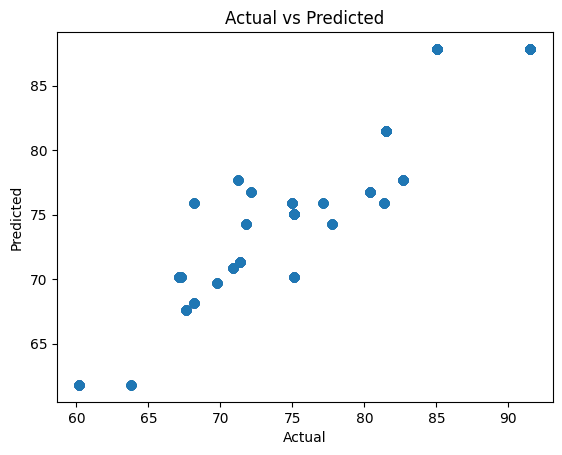

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()